# **LIBRERIAS**

In [4]:
import yaml
import psycopg2
from psycopg2 import sql
from sqlalchemy import create_engine, text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **LECTURA PREVIA DE DATOS**

In [5]:
df_studentsPf = pd.read_csv("student_performance_large_dataset.csv", sep=",")
df_studentsPf.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


### **TIPOS DE DATOS**

In [6]:
print(df_studentsPf.dtypes)


Student_ID                                 object
Age                                         int64
Gender                                     object
Study_Hours_per_Week                        int64
Preferred_Learning_Style                   object
Online_Courses_Completed                    int64
Participation_in_Discussions               object
Assignment_Completion_Rate (%)              int64
Exam_Score (%)                              int64
Attendance_Rate (%)                         int64
Use_of_Educational_Tech                    object
Self_Reported_Stress_Level                 object
Time_Spent_on_Social_Media (hours/week)     int64
Sleep_Hours_per_Night                       int64
Final_Grade                                object
dtype: object


# **CONFIGURACIÓN BD**

### Lectura archivo config.yaml

In [7]:
def load_config(file_path="config.yaml"):
    with open(file_path, "r") as file:
        return yaml.safe_load(file)

In [8]:
config = load_config()
db_config = config["database"]

# Load credentials
db_user = db_config["user"]
db_password = db_config["password"]
db_host = db_config["host"]
db_port = db_config["port"]
db_name = db_config["name"]

# DB connection
conn = psycopg2.connect(
    dbname="postgres",
    user=db_user,
    password=db_password,
    host=db_host,
    port=db_port
)
conn.autocommit = True

### Creación de BD

In [9]:
db_name = "studentsPfL"
try:
    with conn.cursor() as cur:
        cur.execute(sql.SQL("CREATE DATABASE {}").format(sql.Identifier(db_name)))
        print(f"Base de datos '{db_name}' creada exitosamente.")
except psycopg2.errors.DuplicateDatabase:
    print(f"La base de datos '{db_name}' ya existe.")
finally:
    conn.close()

La base de datos 'studentsPfL' ya existe.


### INSERTAR DATOS CRUDOS A LA BD

In [10]:

# Configurar la conexión con PostgreSQL
engine = create_engine(f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

# Insertar el DataFrame en la tabla 'StudentsPF'
df_studentsPf.to_sql("StudentsPFL", con=engine, if_exists="append", index=False)
print("✅ Datos insertados en la tabla 'df_studentsPfL' correctamente.")
print(f"✅ Se incorporaron '{df_studentsPf.shape[0]}' registros.")


✅ Datos insertados en la tabla 'df_studentsPfL' correctamente.
✅ Se incorporaron '10000' registros.


# EDA (exploratory data analysis)

#### Verificar el tamaño del dataset

In [11]:
df_transformedST = df_studentsPf
print(f"Total Rows: {df_transformedST.shape[0]}, Total Columns: {df_transformedST.shape[1]}")

Total Rows: 10000, Total Columns: 15


### Obtener una muestra aleatoria

In [12]:
df_transformedST.sample(1)

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
1539,S01540,25,Female,18,Visual,13,No,83,56,71,No,Medium,10,4,C


### Información General del Dataset


In [13]:
df_transformedST.isnull().sum()

Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64

C:\Users\cfari\AppData\Local\Temp\ipykernel_9816\2234283776.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_values.index, y=unique_values.values, palette="viridis")


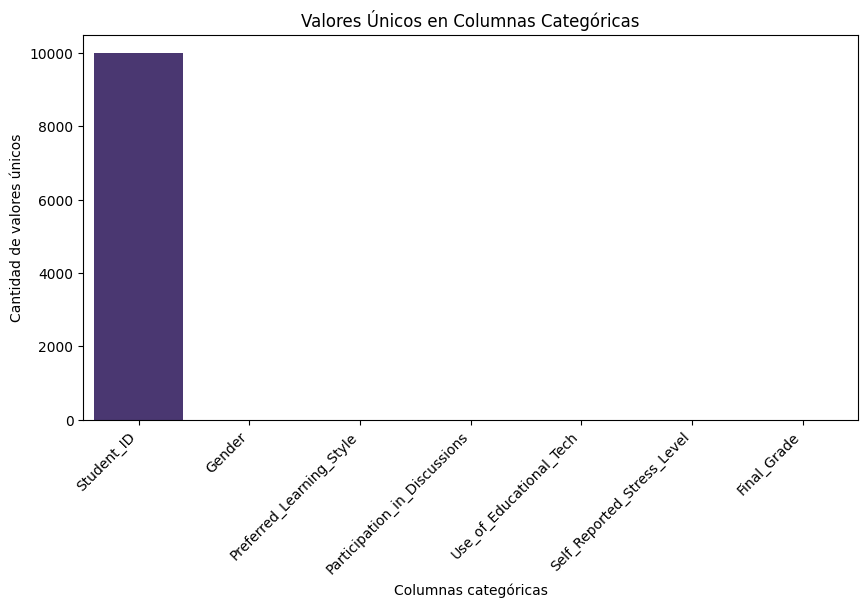

In [14]:
# Verificar si el DataFrame contiene datos
if not df_transformedST.empty:
    # Calcular valores únicos en columnas categóricas
    categorical_columns = df_transformedST.select_dtypes(include=["object", "category"]).columns
    unique_values = df_transformedST[categorical_columns].nunique()

    # Crear el gráfico solo si hay datos en las columnas categóricas
    if not unique_values.empty:
        plt.figure(figsize=(10, 5))
        sns.barplot(x=unique_values.index, y=unique_values.values, palette="viridis")

        # Configuración del gráfico
        plt.xticks(rotation=45, ha="right")
        plt.xlabel("Columnas categóricas")
        plt.ylabel("Cantidad de valores únicos")
        plt.title("Valores Únicos en Columnas Categóricas")

        # Mostrar el gráfico
        plt.show()
    else:
        print("No hay columnas categóricas con datos en el DataFrame.")
else:
    print("El DataFrame está vacío. Por favor, carga los datos correctamente.")


C:\Users\cfari\AppData\Local\Temp\ipykernel_9816\4073885124.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Duplicados", "Únicos"], y=[duplicates, unique_values], palette=["red", "green"])


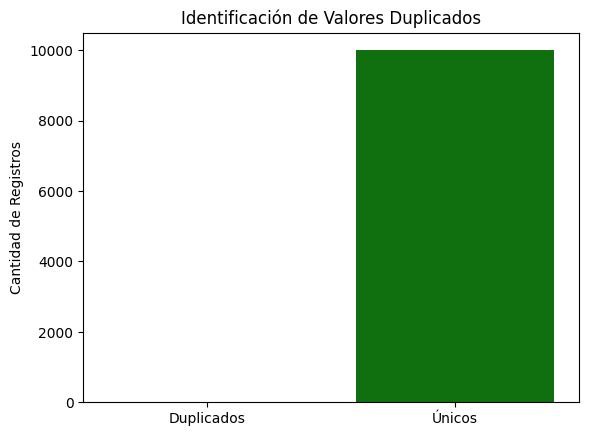

In [15]:
# Verificar si el DataFrame tiene datos antes de graficar
if not df_transformedST.empty:
    # Calcular duplicados
    duplicates = df_transformedST.duplicated().sum()
    unique_values = len(df_transformedST) - duplicates

    # Graficar duplicados vs únicos en una sola línea
    sns.barplot(x=["Duplicados", "Únicos"], y=[duplicates, unique_values], palette=["red", "green"])

    # Configuración del gráfico
    plt.title("Identificación de Valores Duplicados")
    plt.ylabel("Cantidad de Registros")
    plt.show()
else:
    print("El DataFrame está vacío. No se pueden contar duplicados.")


### Análisis Estadístico


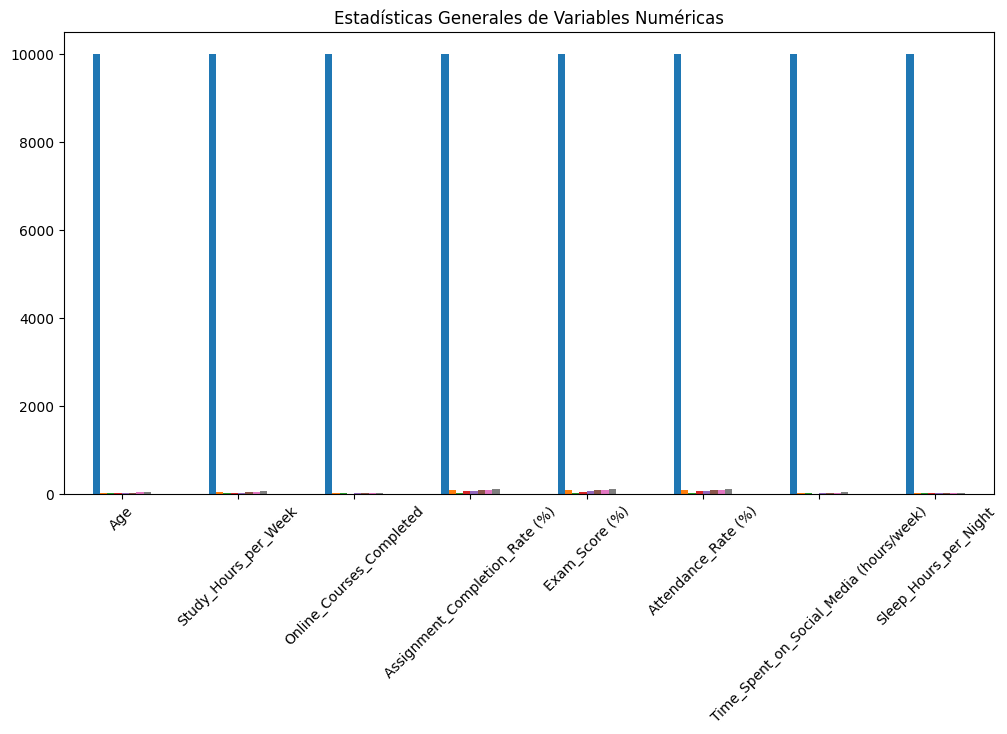

In [16]:

# Generar estadísticas generales para variables numéricas y graficarlas
if not df_transformedST.empty:
    df_transformedST.describe().T.plot(kind="bar", figsize=(12, 6), legend=False, title="Estadísticas Generales de Variables Numéricas")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("El DataFrame está vacío. No se pueden generar estadísticas.")


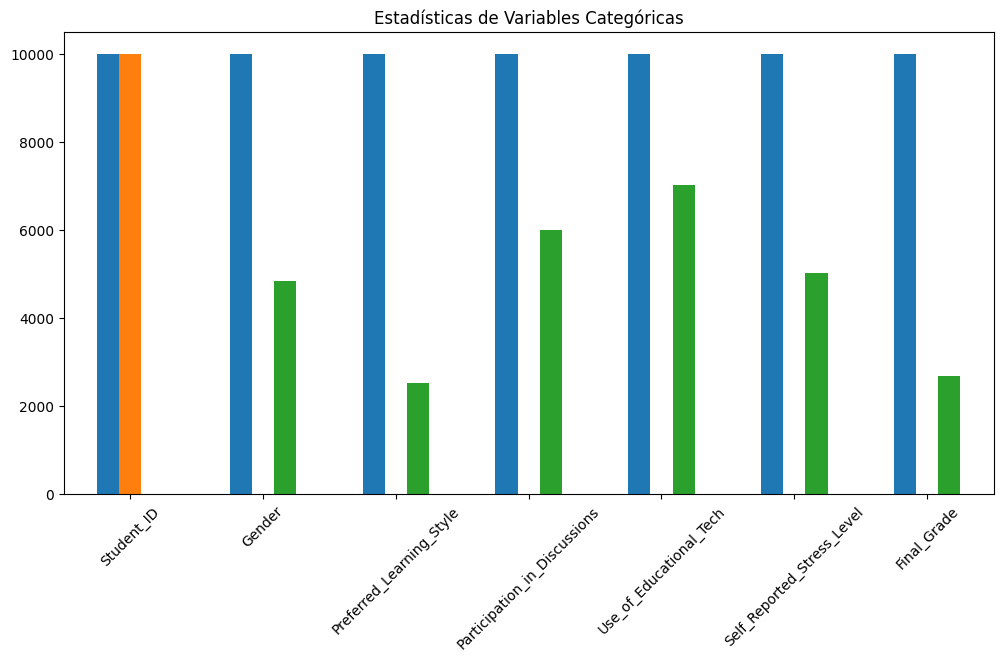

In [17]:
import matplotlib.pyplot as plt

# Generar estadísticas generales para variables categóricas y graficarlas
if not df_transformedST.empty:
    df_transformedST.describe(include="object").T.plot(kind="bar", figsize=(12, 6), legend=False, title="Estadísticas de Variables Categóricas")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("El DataFrame está vacío. No se pueden generar estadísticas para variables categóricas.")


### Distribución de datos en variables numéricas

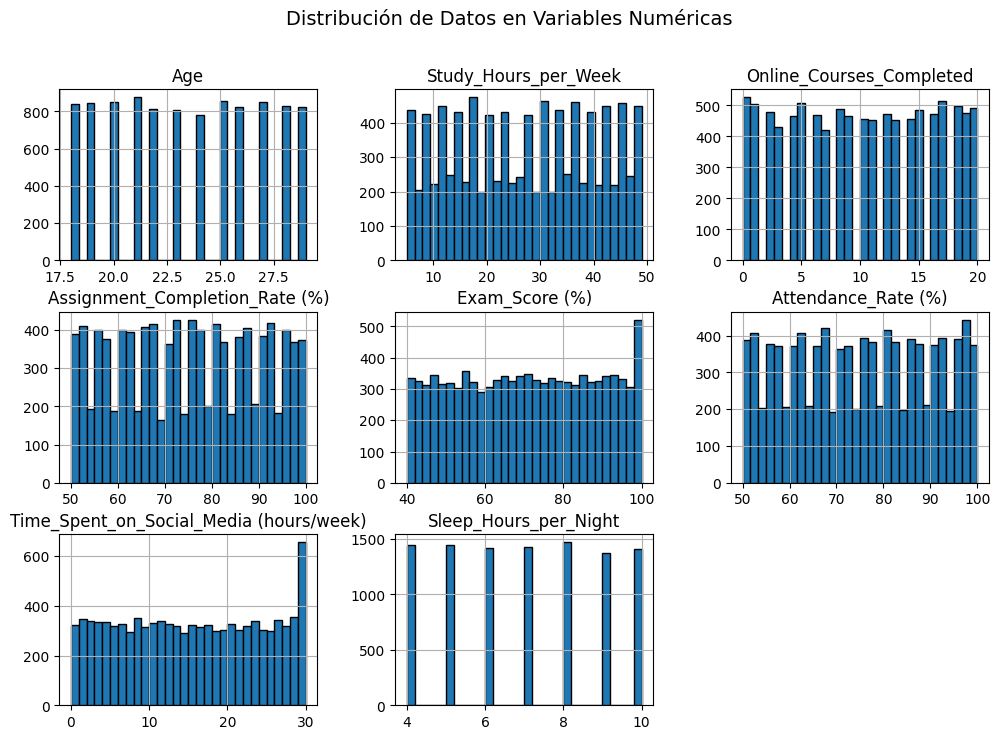

In [18]:

# Generar histogramas para visualizar la distribución de variables numéricas
if not df_transformedST.empty:
    df_transformedST.hist(figsize=(12, 8), bins=30, edgecolor="black")
    plt.suptitle("Distribución de Datos en Variables Numéricas", fontsize=14)
    plt.show()
else:
    print("El DataFrame está vacío. No se pueden generar histogramas.")

Boxplots para detectar valores atípicos (outliers)

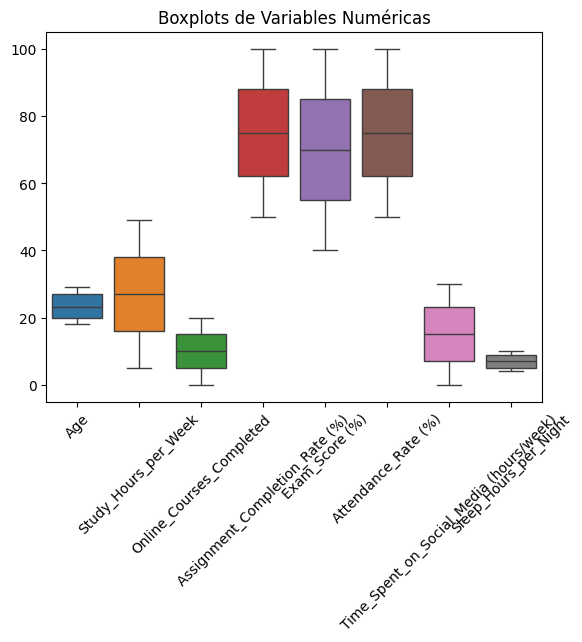

In [19]:
sns.boxplot(data=df_transformedST.select_dtypes(include="number")) if not df_transformedST.empty else print("El DataFrame está vacío.")
plt.xticks(rotation=45)
plt.title("Boxplots de Variables Numéricas")
plt.show()


### MANEJO DE VALORES NULOS

In [20]:
df_transformedST.dropna()  # Eliminar todas las filas con nulos


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


### Casteo de Datos

In [21]:
# Lista de columnas categóricas a convertir
categorical_columns = ["Gender", "Preferred_Learning_Style", "Participation_in_Discussions",
                       "Use_of_Educational_Tech", "Final_Grade"]

# Convertir cada columna a categoría y luego a número
for col in categorical_columns:
    df_transformedST[col] = df_transformedST[col].astype("category").cat.codes  # Convertir a categoría y luego a código entero

### VALIDAR VALORES DUPLICADOS

In [22]:
# Verificar si el DataFrame tiene valores duplicados y generar un mensaje
if not df_transformedST.empty:
    duplicate_count = df_transformedST.duplicated().sum()
    message = f"✅ El DataFrame tiene {duplicate_count} valores duplicados." if duplicate_count > 0 else "✅ No hay valores duplicados en el DataFrame."
    print(message)
else:
    print("⚠️ El DataFrame está vacío. No se pueden verificar duplicados.")


✅ No hay valores duplicados en el DataFrame.


In [23]:
# Verificar si el DataFrame tiene filas duplicadas y generar un mensaje
if not df_transformedST.empty:
    duplicated_rows = df_transformedST[df_transformedST.duplicated()]
    if not duplicated_rows.empty:
        print(f"⚠️ El DataFrame tiene {len(duplicated_rows)} filas duplicadas.")
    else:
        print("✅ No hay filas duplicadas en el DataFrame.")
else:
    print("⚠️ El DataFrame está vacío. No se pueden verificar filas duplicadas.")


✅ No hay filas duplicadas en el DataFrame.


Transformacion

### Agrupamiento y su Relación con el Rendimiento Estudiantil

| **Agrupamiento**                     | **¿Cómo ayuda a entender el rendimiento estudiantil?** |
|--------------------------------------|------------------------------------------------|
| **Age_Category (Edad)**              | Nos permite analizar si la edad afecta el rendimiento. Estudiantes más jóvenes pueden tener menos madurez académica, mientras que adultos pueden manejar mejor su tiempo de estudio. |
| **Study_Category (Horas de Estudio)** | Es clave para el rendimiento. Se espera que los estudiantes que estudian más tengan mejor desempeño. Debemos validar esta hipótesis con correlaciones. |
| **Online_Course_Level (Cursos en Línea)** | Evalúa si el aprendizaje autodidacta mejora el rendimiento académico. ¿Los estudiantes que toman más cursos en línea tienen mejores notas? |
| **Attendance_Category (Asistencia)**  | La asistencia regular es un fuerte predictor del rendimiento. Si la asistencia es baja, es probable que el rendimiento también lo sea. |
| **Stress_Category (Nivel de Estrés)** | Un alto nivel de estrés puede afectar el rendimiento académico. ¿Los estudiantes con estrés moderado o bajo tienen mejores puntajes? |
| **Social_Media_Usage (Uso de Redes Sociales)** | Queremos saber si un alto uso de redes sociales está relacionado con un peor rendimiento. ¿Los que usan redes menos tienen mejores notas? |


In [24]:
# Agrupamiento por Categorías de Edad
def categorize_age(age):
    if age < 20:
        return "Teenager"
    elif 20 <= age <= 25:
        return "Young Adult"
    else:
        return "Adult"
df_transformedST["Age_Category"] = df_transformedST["Age"].apply(categorize_age)

#Agrupamiento de sueño
def sleep_category(hours):
    if hours >= 8:
        return "enough sleep "
    elif 5 <= hours < 8:
        return "Moderate"
    else:
        return "low sleep"
df_transformedST["Sleep_Category"] = df_transformedST["Sleep_Hours_per_Night"].apply(sleep_category)


def study_category(hours):
    if hours >= 15:
        return "High Study"
    elif 7 <= hours < 15:
        return "Moderate Study"
    else:
        return "Low Study"
df_transformedST["Study_Category"] = df_transformedST["Study_Hours_per_Week"].apply(study_category)

# Agrupamiento por Categorías de Estudio
def online_course_category(courses):
    if courses >= 5:
        return "Expert"
    elif 2 <= courses < 5:
        return "Intermediate"
    else:
        return "Beginner"
df_transformedST["Online_Course_Level"] = df_transformedST["Online_Courses_Completed"].apply(online_course_category)

# Agrupamiento por Cursos en Línea
def attendance_category(rate):
    if rate >= 85:
        return "High Attendance"
    elif 60 <= rate < 85:
        return "Moderate Attendance"
    else:
        return "Low Attendance"
df_transformedST["Attendance_Category"] = df_transformedST["Attendance_Rate (%)"].apply(attendance_category)

# Agrupamiento por Nivel de Estrés
def stress_category(level):
    if level == 2:
        return "High Stress"
    elif level == 1:
        return "Moderate Stress"
    else:
        return "Low Stress"
df_transformedST["Stress_Category"] = df_transformedST["Self_Reported_Stress_Level"].apply(stress_category)

# Agrupamiento por Uso de Redes Sociales
def social_media_category(hours):
    if hours >= 10:
        return "High Social Media Use"
    elif 5 <= hours < 10:
        return "Medium Social Media Use"
    else:
        return "Low Social Media Use"
df_transformedST["Social_Media_Usage"] = df_transformedST["Time_Spent_on_Social_Media (hours/week)"].apply(social_media_category)


In [25]:
display(df_transformedST)

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),...,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Age_Category,Sleep_Category,Study_Category,Online_Course_Level,Attendance_Category,Stress_Category,Social_Media_Usage
0,S00001,18,0,48,1,14,1,100,69,66,...,9,8,2,Teenager,enough sleep,High Study,Expert,Moderate Attendance,Low Stress,Medium Social Media Use
1,S00002,29,0,30,2,20,0,71,40,57,...,28,8,3,Adult,enough sleep,High Study,Expert,Low Attendance,Low Stress,High Social Media Use
2,S00003,20,0,47,1,11,0,60,43,79,...,13,7,3,Young Adult,Moderate,High Study,Expert,Moderate Attendance,Low Stress,High Social Media Use
3,S00004,23,0,13,0,0,1,63,70,60,...,24,10,1,Young Adult,enough sleep,Moderate Study,Beginner,Moderate Attendance,Low Stress,High Social Media Use
4,S00005,19,0,24,0,19,1,59,63,93,...,26,8,2,Teenager,enough sleep,High Study,Expert,High Attendance,Low Stress,High Social Media Use
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,1,30,0,6,1,62,58,76,...,17,6,2,Young Adult,Moderate,High Study,Expert,Moderate Attendance,Low Stress,High Social Media Use
9996,S09997,23,0,16,3,8,1,54,84,86,...,6,5,1,Young Adult,Moderate,High Study,Expert,High Attendance,Low Stress,Medium Social Media Use
9997,S09998,26,1,23,3,3,1,54,40,70,...,20,8,3,Adult,enough sleep,High Study,Intermediate,Moderate Attendance,Low Stress,High Social Media Use
9998,S09999,18,1,41,2,7,1,66,45,90,...,6,8,3,Teenager,enough sleep,High Study,Expert,High Attendance,Low Stress,Medium Social Media Use


In [26]:

df_transformedST.to_csv(r"C:\Users\cfari\OneDrive\Escritorio\ETL\Entregables\PF_ETL\your_output_file.csv", index=False)



In [27]:
df_estudiantes = df_transformedST[['Student_ID', 'Age', 'Gender']].drop_duplicates()
df_estudiantes.to_csv(r"C:\Users\cfari\OneDrive\Escritorio\ETL\Entregables\PF_ETL\Estudiantes.csv", index=False)
display(df_estudiantes)

,Student_ID,Age,Gender
0,S00001,18,0
1,S00002,29,0
2,S00003,20,0
3,S00004,23,0
4,S00005,19,0
...,...,...,...
9995,S09996,20,1
9996,S09997,23,0
9997,S09998,26,1
9998,S09999,18,1


In [28]:
df_evaluacion_academica = df_transformedST[['Student_ID', 'Assignment_Completion_Rate (%)', 'Exam_Score (%)', 'Attendance_Rate (%)', 'Study_Hours_per_Week', 'Use_of_Educational_Tech']].drop_duplicates()
df_evaluacion_academica.to_csv(r"C:\Users\cfari\OneDrive\Escritorio\ETL\Entregables\PF_ETL\Evaluacion_Academica.csv", index=False)


In [29]:
df_participacion = df_transformedST[['Student_ID', 'Participation_in_Discussions', 'Online_Courses_Completed']].drop_duplicates()
df_participacion.to_csv(r"C:\Users\cfari\OneDrive\Escritorio\ETL\Entregables\PF_ETL\Participacion.csv", index=False)


In [30]:
df_hechos = df_transformedST[['Student_ID', 'Final_Grade']].drop_duplicates()
df_hechos.to_csv(r"C:\Users\cfari\OneDrive\Escritorio\ETL\Entregables\PF_ETL\Hechos.csv", index=False)



In [38]:

# Configurar la conexión con PostgreSQL
engine = create_engine(f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")

# Insertar el DataFrame en la tabla 'StudentsPF'
df_transformedST.to_sql("df_Merged_transformedST", con=engine, if_exists="append", index=False)
print("✅ Datos insertados en la tabla 'df_Merged_transformedST' correctamente.")
print(f"✅ Se incorporaron '{df_transformedST.shape[0]}' registros.")

✅ Datos insertados en la tabla 'df_Merged_transformedST' correctamente.
✅ Se incorporaron '10000' registros.
